In [1]:
from plotting.plotting import make_visual
from datasets.preprocessor import Preprocessor_2p5D
from load_config import load_config
import torch
import json

In [2]:
# %matplotlib ipympl

In [3]:
config = load_config()

In [4]:
preprocessor = Preprocessor_2p5D(config)

In [5]:
with open('./datasets/split.json', 'r') as f:
    split = json.load(f)


In [6]:
train_indices = split['train']
len(train_indices)

100

In [7]:
seg = preprocessor.get_seg(train_indices[0])
seg.shape

torch.Size([512, 512, 94])

In [8]:
(seg == 1).float().mean()

tensor(0.0251)

In [35]:
from tqdm import tqdm
from scipy.ndimage import label
import numpy as np

structure = np.ones((3, 3, 3), dtype=int)

results = []
for idx in tqdm(train_indices):
    seg = preprocessor.get_seg(idx)

    liver_pct = (seg == 1).float().mean()
    cancer_pct = (seg == 2).float().mean()

    _, cancer_connected_components = label((seg==2).int().numpy(), structure)
    depth = seg.shape[2]

    results.append((liver_pct, cancer_pct, depth, cancer_connected_components))


100%|██████████| 100/100 [11:41<00:00,  7.01s/it]


In [36]:
res_np = np.array(results)

In [37]:
res_np.shape

(100, 4)

In [39]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data=res_np, columns=('liver', 'cancer', 'depth', 'components'))
df


,liver,cancer,depth,components
0,0.025107,0.000172,94.0,2.0
1,0.020232,0.000082,105.0,2.0
2,0.014994,0.000385,836.0,29.0
3,0.011253,0.000048,240.0,1.0
4,0.025214,0.001324,107.0,2.0
...,...,...,...,...
95,0.039384,0.012284,135.0,15.0
96,0.023512,0.002016,432.0,5.0
97,0.021850,0.000006,565.0,5.0
98,0.028218,0.004394,168.0,10.0


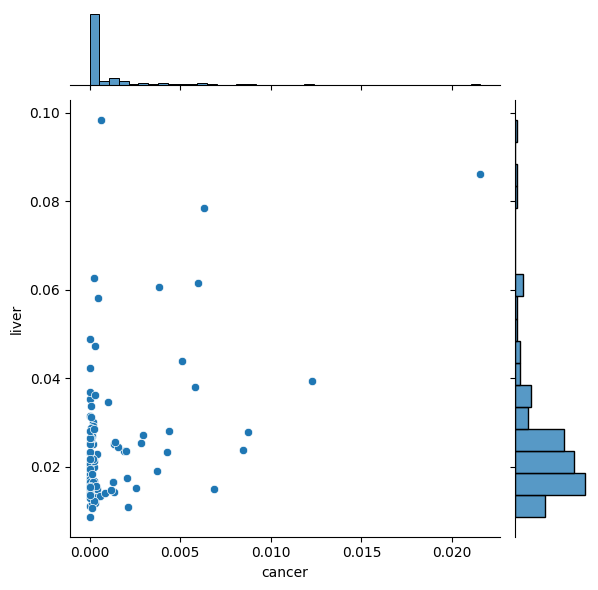

In [40]:
import matplotlib.pyplot as plt
sns.jointplot(data=df, x='cancer', y='liver')

In [6]:
vol, seg = img
vol.shape

(512, 512, 333)

In [15]:
%matplotlib inline

Text(0.5, 1.0, 'Distribution of scan depth')

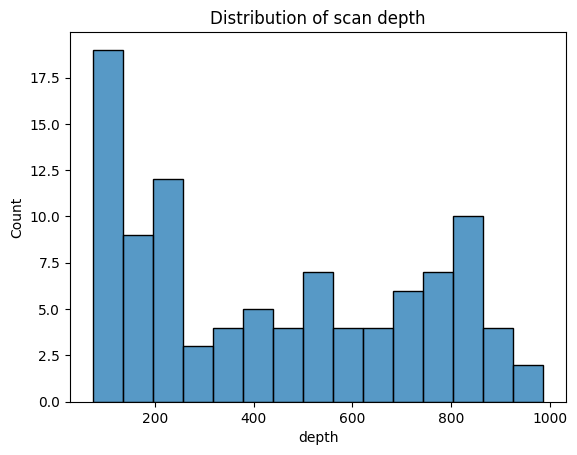

In [24]:
sns.histplot(data=df, x='depth', bins=15)
plt.title("Distribution of scan depth")

Text(0.5, 1.0, 'Number of tumors')

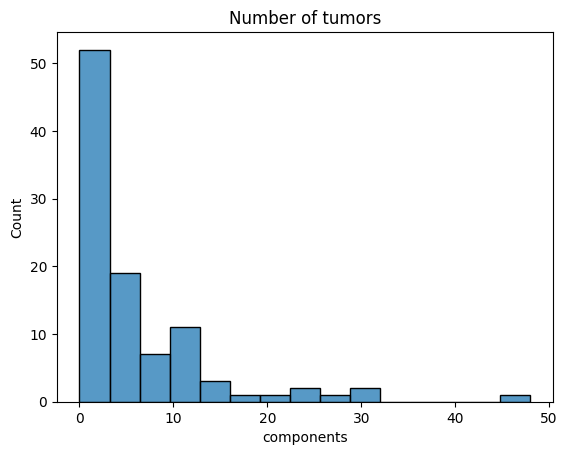

In [41]:
sns.histplot(data=df, x='components', bins=15)
plt.title("Number of tumors")